#  PROJECT NAME: TRAIN DIFFERENT TYPES OF ALGORITHM TO CLASSIFY MUSHROOM AS EDIBLE OR POISONOUS.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:/Users/vansh/Downloads/mashroom data set.csv')
df.head()

,classes,cap-diameter,cap-shape,cap-surface,cap-color,bruise,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [5]:
df.tail()

,classes,cap-diameter,cap-shape,cap-surface,cap-color,bruise,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61068,p,1.17,s,s,y,f,f,f,f,3.25,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [6]:
df.shape

(61069, 21)

In [3]:
#drop variable if missing value is greater than 50%
#if missing value less than 50% then fill missing value
#if continuous fill by mean
#if categorical fill by mode
missing=df.isnull().sum()/df.shape[0]*100
print(missing)

classes               0.000000
cap-diameter          0.000000
cap-shape             0.000000
cap-surface          23.121387
cap-color             0.000000
bruise                0.000000
gill-attachment      16.184971
gill-spacing         41.040462
gill-color            0.000000
stem-height           0.000000
stem-width            0.000000
stem-root            84.393064
stem-surface         62.427746
stem-color            0.000000
veil-type            94.797688
veil-color           87.861272
has-ring              0.000000
ring-type             4.046243
spore-print-color    89.595376
habitat               0.000000
season                0.000000
dtype: float64


In [4]:
df['cap-surface']=df['cap-surface'].fillna(df['cap-surface'].mode().iloc[0])
df['gill-attachment']=df['gill-attachment'].fillna(df['gill-attachment'].mode().iloc[0])
df['ring-type']=df['ring-type'].fillna(df['ring-type'].mode().iloc[0])

In [5]:
updated_df=df.drop(columns=['gill-spacing','stem-root','stem-surface','veil-type','veil-color','spore-print-color'])
updated_df

,classes,cap-diameter,cap-shape,cap-surface,cap-color,bruise,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,w,16.53,17.20,w,t,p,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,3.93,6.22,y,f,f,d,a
61065,p,1.27,f,s,y,f,f,f,3.18,5.43,y,f,f,d,a
61066,p,1.27,s,s,y,f,f,f,3.86,6.37,y,f,f,d,u
61067,p,1.24,f,s,y,f,f,f,3.56,5.44,y,f,f,d,u


In [25]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   classes          61069 non-null  object 
 1   cap-diameter     61069 non-null  float64
 2   cap-shape        61069 non-null  object 
 3   cap-surface      61069 non-null  object 
 4   cap-color        61069 non-null  object 
 5   bruise           61069 non-null  object 
 6   gill-attachment  61069 non-null  object 
 7   gill-color       61069 non-null  object 
 8   stem-height      61069 non-null  float64
 9   stem-width       61069 non-null  float64
 10  stem-color       61069 non-null  object 
 11  has-ring         61069 non-null  object 
 12  ring-type        61069 non-null  object 
 13  habitat          61069 non-null  object 
 14  season           61069 non-null  object 
dtypes: float64(3), object(12)
memory usage: 7.0+ MB


In [44]:
classes=df["classes"].value_counts()
classes

classes
p    33888
e    27181
Name: count, dtype: int64

In [63]:
updated_df.isnull().sum()

classes            0
cap-diameter       0
cap-shape          0
cap-surface        0
cap-color          0
bruise             0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
has-ring           0
ring-type          0
habitat            0
season             0
dtype: int64

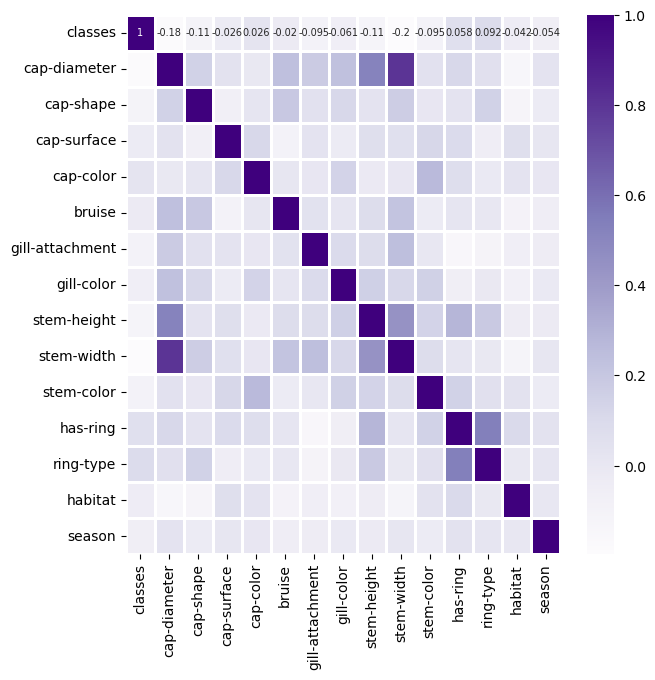

In [12]:
plt.figure(figsize=(7,7))
sns.heatmap(updated_df.corr(),linewidths=1,cmap='Purples',annot=True,annot_kws={'size':7})
plt.yticks(rotation=0);


Interpretation:

Usually, the least correlating variable is most important one for classification. 

In this case, stem-width is more important for classification


# bar plot

<function matplotlib.pyplot.show(close=None, block=None)>

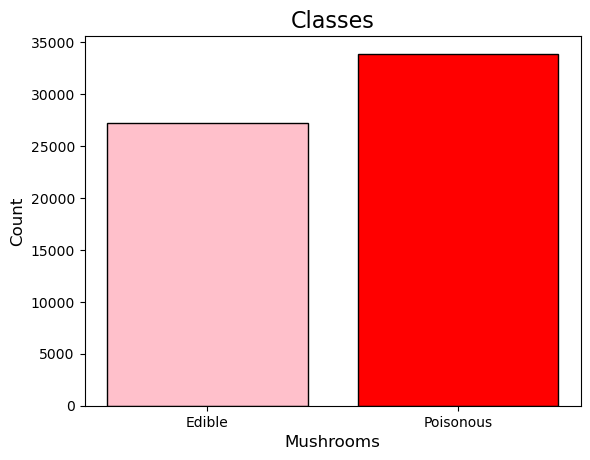

In [58]:
plt.bar("Edible",classes["e"],color="pink",edgecolor="black")
plt.bar("Poisonous",classes["p"],color="red",edgecolor="black")
plt.ylabel('Count',fontsize=12)
plt.xlabel('Mushrooms',fontsize=12)
plt.title("Classes",fontsize=16)
plt.show

Interpretation:

We see that the "Edible" and "Poissonous" values are very close to each other.this means that the data is balanced.

# count plot

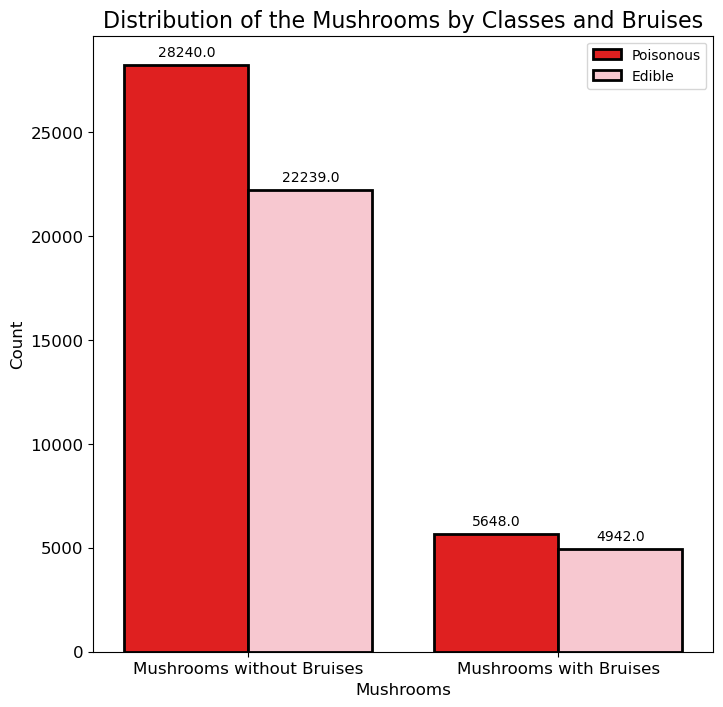

In [6]:
plt.figure(figsize=(8, 8))
splot = sns.countplot(data=updated_df, x='bruise',hue='classes',order=updated_df['bruise'].value_counts().index,palette=['red', 'pink'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)                    
splot.set_xticklabels(['Mushrooms without Bruises', 'Mushrooms with Bruises'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')                  
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Mushrooms', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by Classes and Bruises', fontsize=16)
plt.show()

Interpretation:

We see from above graph that both mushrooms without bruises and with bruises are high frequently poisonous.

# pie chart

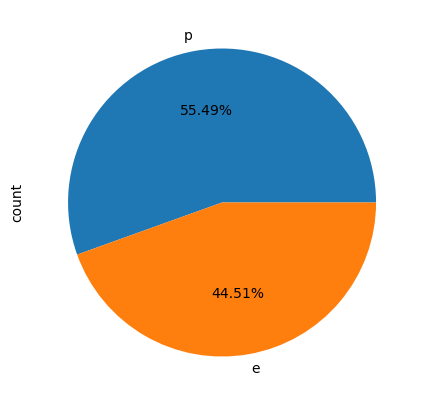

In [65]:
labels = ['Edible', 'Poison']
values = updated_df['classes'].value_counts()
updated_df["classes"].value_counts().plot.pie(autopct="%1.2f%%",figsize=(5,5))
plt.show()

Interpretation:

There are 44.51% samples of edible mushrooms and 55.49% samples are of poisonous one. 

i.e. Nearly 55% chances of picking a poisonous mushroom from the sample.

# count plot

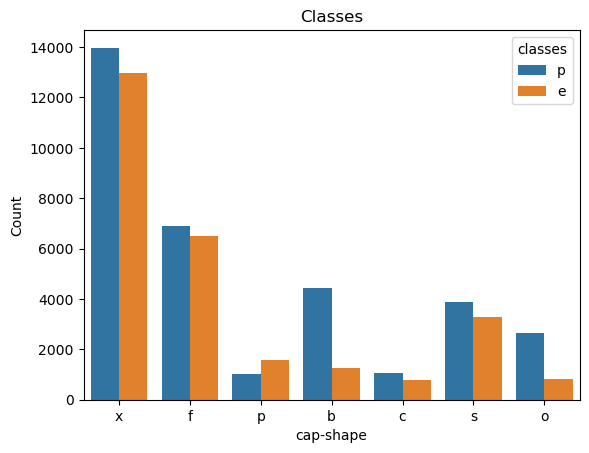

In [8]:
import seaborn as sns
sns.countplot(x=updated_df["cap-shape"],hue=updated_df["classes"])
plt.title("Classes")
plt.xlabel("cap-shape")
plt.ylabel("Count")
plt.show()

# data preprocessing

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
updated_df=updated_df.apply(LabelEncoder().fit_transform)
updated_df.head()

,classes,cap-diameter,cap-shape,cap-surface,cap-color,bruise,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,1481,6,2,6,0,2,10,1577,1656,11,1,2,0,3
1,1,1614,6,2,6,0,2,10,1681,1766,11,1,2,0,2
2,1,1362,6,2,6,0,2,10,1662,1721,11,1,2,0,3
3,1,1372,2,3,1,0,2,10,1463,1545,11,1,5,0,3
4,1,1419,6,3,6,0,2,10,1537,1667,11,1,5,0,3


In [8]:
#independent and dependent variables
X=updated_df.drop(['classes'],axis=1)
y=updated_df['classes']

In [9]:
#split the data into train test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# *Algorithms before finding feature importance. i.e. on original data

# 1.Decision Tree Algorithm

In [30]:
#model training
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42,max_depth=5)

#fit the model on the training data
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [31]:
dt.score(X_train,y_train)

0.6949749258008392

In [32]:
#accuracy
from sklearn.metrics import accuracy_score
y_pred=dt.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy=',accuracy)

Accuracy= 0.6933027673161946


In [19]:
#classification report
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print("Classification Report:",report)

Classification Report:               precision    recall  f1-score   support

           0       0.66      0.63      0.65      5374
           1       0.72      0.74      0.73      6840

    accuracy                           0.69     12214
   macro avg       0.69      0.69      0.69     12214
weighted avg       0.69      0.69      0.69     12214



In [20]:
#confusion matrix
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",matrix)

Confusion Matrix:
 [[3405 1969]
 [1777 5063]]


In [21]:
#precision score
from sklearn.metrics import precision_score
y_pred=dt.predict(X_test)
precision=precision_score(y_test,y_pred)
print('Precision=',precision)

Precision= 0.7199943117178612


In [22]:
#recall score
from sklearn.metrics import recall_score
y_pred=dt.predict(X_test)
recall=recall_score(y_test,y_pred)
print('recall=',recall)

recall= 0.7402046783625731


# 2.Naive Bayes Model

In [31]:
#model training
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
gnb=GaussianNB()
gnb

GaussianNB()

In [32]:
#fit the model on the training data
model=gnb.fit(X_train,y_train)
model

GaussianNB()

In [33]:
y_pred=gnb.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [34]:
model.score(X_test,y_test)

0.592680530538726

In [35]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.54      0.54      5374
           1       0.64      0.64      0.64      6840

    accuracy                           0.59     12214
   macro avg       0.59      0.59      0.59     12214
weighted avg       0.59      0.59      0.59     12214



In [36]:
#recall
from sklearn.metrics import precision_score,recall_score,accuracy_score
recall=recall_score(y_test,y_pred)
recall

0.6364035087719299

In [37]:
#precision
precision=precision_score(y_test,y_pred)
precision

0.6363104809238416

In [38]:
#accuracy
acc=accuracy_score(y_test,y_pred)
acc

0.592680530538726

In [39]:
#confusion matrix
cm=confusion_matrix(y_pred,y_test)
cm

array([[2886, 2487],
       [2488, 4353]], dtype=int64)

# 3.knn classifier

In [40]:
#model training
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#fit the model on the training data
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [41]:
y_pred=knn.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [42]:
#Accuracy
acc=accuracy_score(y_test,y_pred)
acc

0.8093171770099885

In [43]:
#recall
from sklearn.metrics import precision_score,recall_score,accuracy_score
recall=recall_score(y_test,y_pred)
recall

0.8235380116959065

In [44]:
#precision
from sklearn.metrics import precision_score,recall_score,accuracy_score
precision=precision_score(y_test,y_pred)
precision

0.833900814211695

In [45]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      5374
           1       0.83      0.82      0.83      6840

    accuracy                           0.81     12214
   macro avg       0.81      0.81      0.81     12214
weighted avg       0.81      0.81      0.81     12214



In [46]:
#confusuion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[4252, 1122],
       [1207, 5633]], dtype=int64)

# 4. Random Forest Classifier

In [49]:
#model training
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=5)
rf

RandomForestClassifier(max_depth=5)

In [50]:
#fit the model on the training data
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.8061610889366493

In [51]:
#accuracy
from sklearn.metrics import accuracy_score
y_pred=rf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy=',accuracy)

Accuracy= 0.8042410348780088


In [52]:
#classification report
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print("Classification Report:",report)

Classification Report:               precision    recall  f1-score   support

           0       0.76      0.81      0.78      5374
           1       0.84      0.80      0.82      6840

    accuracy                           0.80     12214
   macro avg       0.80      0.80      0.80     12214
weighted avg       0.81      0.80      0.80     12214



In [53]:
#confusion matrix
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",matrix)

Confusion Matrix:
 [[4335 1039]
 [1352 5488]]


In [54]:
#precision score
from sklearn.metrics import precision_score
y_pred=rf.predict(X_test)
precision=precision_score(y_test,y_pred)
print('Precision=',precision)

Precision= 0.8408150758388233


In [55]:
#recall score
from sklearn.metrics import recall_score
y_pred=rf.predict(X_test)
recall=recall_score(y_test,y_pred)
print('recall=',recall)

recall= 0.8023391812865497


# 5. Gradient boosting classifier

In [57]:
#model training
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3)
gb_clf

#fit the model on training data
gb_clf.fit(X_train,y_train)
y_pred=gb_clf.predict(X_test)

In [58]:
#accuracy
from sklearn.metrics import accuracy_score
y_pred=gb_clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy=',accuracy)

Accuracy= 0.9140330767971181


In [59]:
#classification report
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print("Classification Report:",report)

Classification Report:               precision    recall  f1-score   support

           0       0.91      0.90      0.90      5374
           1       0.92      0.93      0.92      6840

    accuracy                           0.91     12214
   macro avg       0.91      0.91      0.91     12214
weighted avg       0.91      0.91      0.91     12214



In [60]:
#confusion matrix
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",matrix)

Confusion Matrix:
 [[4823  551]
 [ 499 6341]]


In [61]:
#precision score
from sklearn.metrics import precision_score
y_pred=gb_clf.predict(X_test)
precision=precision_score(y_test,y_pred)
print('Precision=',precision)

Precision= 0.9200522344747534


In [62]:
#recall score
from sklearn.metrics import recall_score
y_pred=gb_clf.predict(X_test)
recall=recall_score(y_test,y_pred)
print('recall=',recall)

recall= 0.927046783625731


# 6. Logistic regression

In [63]:
#model training
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(max_iter=1000)

In [64]:
#fit the model on training data
log_model.fit(X_train,y_train)

C:\Users\vansh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [65]:
print(f"Logistic Regression:{log_model.score(X_test,y_test)}")

Logistic Regression:0.6171606353364991


In [66]:
# predict the model
y_pred=log_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [67]:
#accuracy score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.6171606353364991

In [70]:
#classification report
report=classification_report(y_test, y_pred)
print('Classification report:',report)

Classification report:               precision    recall  f1-score   support

           0       0.58      0.46      0.51      5374
           1       0.64      0.74      0.68      6840

    accuracy                           0.62     12214
   macro avg       0.61      0.60      0.60     12214
weighted avg       0.61      0.62      0.61     12214



In [71]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[2459, 2915],
       [1761, 5079]], dtype=int64)

In [72]:
#precision score
from sklearn.metrics import precision_score
y_pred=log_model.predict(X_test)
precision=precision_score(y_test,y_pred)
print('Precision=',precision)

Precision= 0.6353515136352265


In [73]:
#recall score
from sklearn.metrics import recall_score
y_pred=log_model.predict(X_test)
recall=recall_score(y_test,y_pred)
print('recall=',recall)

recall= 0.7425438596491228


# 7. PCA

In [10]:
#standardized the independent variable
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_scaled=scaler.fit_transform(X)

In [18]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
pca

PCA(n_components=10)

In [19]:
X_pca=pca.fit_transform(X_scaled)
print(X_pca)

[[ 3.50263495  1.43850314  0.54851497 ... -0.15662969  0.26182252
   0.7816734 ]
 [ 3.88287809  1.38135224  0.5417271  ... -0.37172453  0.18092331
   0.75839707]
 [ 3.50344978  1.50079901  0.54064924 ... -0.16979549  0.27798672
   0.79637898]
 ...
 [-1.5093312   0.12823719 -1.12569206 ...  0.26652617  1.22878214
   1.12452762]
 [-1.87590871  0.1816618  -1.45975396 ... -0.28966585  1.84596132
   0.6074609 ]
 [-1.65900913  0.11747576 -1.12334992 ...  0.29870316  1.23305197
   1.10602619]]


In [12]:
#variance explained by each component
var=pca.explained_variance_ratio_
print('Variance Explained by each component:\n',var)

Variance Explained by each component:
 [0.18275228 0.12328399 0.10064623 0.08680418 0.07238709 0.06861284
 0.0646653  0.06273271 0.05805206 0.0520632 ]


In [21]:
#cumulative sum of variance explained by each component
var.cumsum()

array([0.18275228, 0.30603627, 0.4066825 , 0.49348667, 0.56587376,
       0.6344866 , 0.6991519 , 0.76188461, 0.81993666, 0.87199986])

Interpretation:

First principal component explain 18.2% variation.

First two principal component explain 30.6% variation.

# 8. Ridge regression algorithm

In [78]:
#model training
from sklearn.linear_model import Ridge 
ridge=Ridge(alpha=1.0)
ridge.fit(X_train,y_train)

Ridge()

In [79]:
y_pred=ridge.predict(X_test)

In [80]:
#mean square error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print('Mean square error:',mse)

Mean square error: 0.2263825333746222


# *comparison of models on original data

In [16]:
#comparison
import pandas as pd
result={ "Model":['D.t.',"N.b.","KNN",'r.f.','g.b.','logistic reg'],"Accuracy":[0.69,0.59,0.80,0.80,0.91,0.61],"Precision":[0.71,0.63,0.83,0.84,0.92,0.63],"Recall":[0.74,0.63,0.82,0.80,0.92,0.74]}
pd.DataFrame(result)

,Model,Accuracy,Precision,Recall
0,D.t.,0.69,0.71,0.74
1,N.b.,0.59,0.63,0.63
2,KNN,0.80,0.83,0.82
3,r.f.,0.80,0.84,0.80
4,g.b.,0.91,0.92,0.92
5,logistic reg,0.61,0.63,0.74


C:\Users\vansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


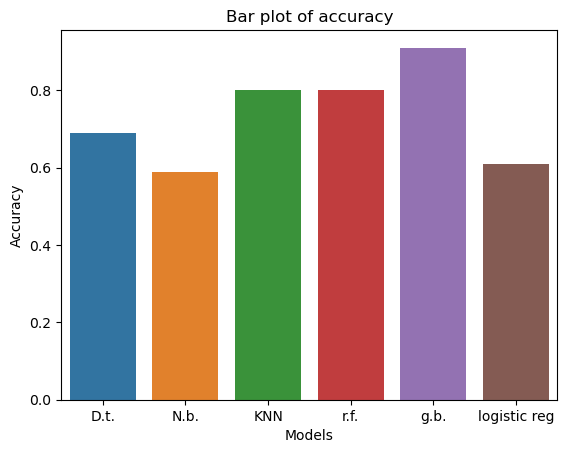

In [17]:
#bar plot of accuracy
sns.barplot(x=result['Model'],y=result['Accuracy'])
plt.title('Bar plot of accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

Interpretation:

1.From above bar plot we conclude that, Gradient boosting classifier is comparatively better than other models to find accuracy of original data.

2.KNN algorithm and random forest classifier shows nearly equal accuracy. 

3.Naive Bayes model shows less accuracy as compared to other models.

C:\Users\vansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


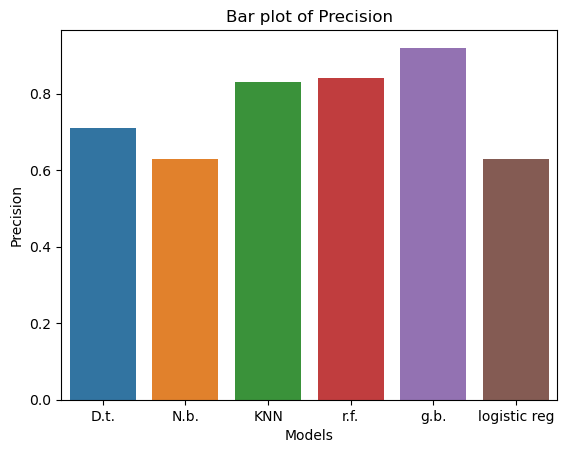

In [18]:
#bar plot of precision
sns.barplot(x=result['Model'],y=result['Precision'])
plt.title('Bar plot of Precision')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.show()

Interpretation:

1.From above bar plot we conclude that, Gradient boosting classifier is comparatively better than other models to find precision of original data.

2.KNN algorithm and random forest classifier shows nearly equal precision. 

3.Naive Bayes model and logistic regression shows less precision as compared to other models.

C:\Users\vansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


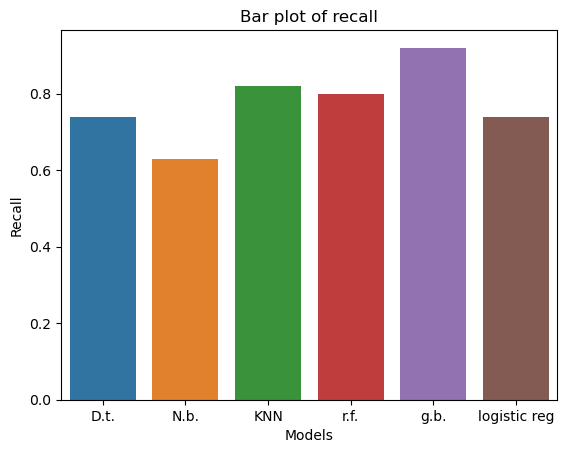

In [19]:
#bar plot of recall
sns.barplot(x=result['Model'],y=result['Recall'])
plt.title('Bar plot of recall')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.show()

Interpretation:

From above bar plot we conclude that, Gradient boosting classifier is comparatively better than other models to find recall of original data.

2.KNN algorithm and random forest classifier shows nearly equal recall.i.e.0.80 approximately. Also, decision tree and logistic regression shows nearly equal recall i.e.0.74

3.Naive Bayes model shows less recall as compared to other models.

# *Important Features

In [33]:
#important features
dt.feature_importances_

array([0.        , 0.02775049, 0.14889686, 0.        , 0.05760716,
       0.00664054, 0.03535132, 0.11242907, 0.26030304, 0.11496862,
       0.00031753, 0.1273687 , 0.07780219, 0.03056447])

In [34]:
#features in ascending order
pd.DataFrame({"variable":X.columns,"important features":dt.feature_importances_*100}).sort_values("important features",ascending=False)

,variable,important features
8,stem-width,26.030304
2,cap-surface,14.889686
11,ring-type,12.736870
9,stem-color,11.496862
7,stem-height,11.242907
12,habitat,7.780219
4,bruise,5.760716
6,gill-color,3.535132
13,season,3.056447
1,cap-shape,2.775049


This indicates that, stem width is more important feature than any other feature in the data set. 

In [35]:
#create dataframe of features having more than 5% feature_importance
data=updated_df.drop(columns=['gill-color','season','cap-shape','gill-attachment','has-ring','cap-diameter','cap-color'])
data

,classes,cap-surface,bruise,stem-height,stem-width,stem-color,ring-type,habitat
0,1,2,0,1577,1656,11,2,0
1,1,2,0,1681,1766,11,2,0
2,1,2,0,1662,1721,11,2,0
3,1,3,0,1463,1545,11,5,0
4,1,3,0,1537,1667,11,5,0
...,...,...,...,...,...,...,...,...
61064,1,7,0,283,569,12,1,0
61065,1,7,0,208,490,12,1,0
61066,1,7,0,276,584,12,1,0
61067,1,7,0,246,491,12,1,0


# *Algorithms after finding feature importance i.e.  on reduced data

# 1. Naive Bayes

In [37]:
#independent and dependent variables
X=data.drop(['classes'],axis=1)
y=data['classes']

In [38]:
#split the data into train test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [85]:
#model training
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
gnb=GaussianNB()
gnb

GaussianNB()

In [86]:
#fit the model on train data
model=gnb.fit(X_train,y_train)
model

GaussianNB()

In [87]:
y_pred=gnb.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [88]:
model.score(X_test,y_test)

0.5769608645816277

In [89]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.54      0.53      5374
           1       0.63      0.61      0.62      6840

    accuracy                           0.58     12214
   macro avg       0.57      0.57      0.57     12214
weighted avg       0.58      0.58      0.58     12214



In [90]:
#recall
from sklearn.metrics import precision_score,recall_score,accuracy_score
recall=recall_score(y_test,y_pred)
recall

0.6083333333333333

In [91]:
#precision
from sklearn.metrics import precision_score,recall_score,accuracy_score
precision=precision_score(y_test,y_pred)
precision

0.6258083922394345

In [92]:
#accuracy
acc=accuracy_score(y_test,y_pred)
acc

0.5769608645816277

In [93]:
#confusion matrix
cm=confusion_matrix(y_pred,y_test)
cm

array([[2886, 2679],
       [2488, 4161]], dtype=int64)

# 2.knn classifier

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#fit the model
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [95]:
y_pred=knn.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [96]:
#accuracy
acc=accuracy_score(y_test,y_pred)
acc

0.7627312919600459

In [98]:
#recall
from sklearn.metrics import precision_score,recall_score,accuracy_score
recall=recall_score(y_test,y_pred)
recall

0.7900584795321638

In [97]:
#precision
from sklearn.metrics import precision_score,recall_score,accuracy_score
precision=precision_score(y_test,y_pred)
precision

0.7870667055053888

In [99]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      5374
           1       0.79      0.79      0.79      6840

    accuracy                           0.76     12214
   macro avg       0.76      0.76      0.76     12214
weighted avg       0.76      0.76      0.76     12214



In [100]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[3912, 1462],
       [1436, 5404]], dtype=int64)

# 3. Random Forest Classifier

In [102]:
#model training
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=5)
rf

RandomForestClassifier(max_depth=5)

In [103]:
#fit model
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.7711800225156074

In [104]:
#accuracy
from sklearn.metrics import accuracy_score
y_pred=rf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy=',accuracy)

Accuracy= 0.7676436875716391


In [105]:
#classification report
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print("Classification Report:",report)

Classification Report:               precision    recall  f1-score   support

           0       0.75      0.71      0.73      5374
           1       0.78      0.82      0.80      6840

    accuracy                           0.77     12214
   macro avg       0.77      0.76      0.76     12214
weighted avg       0.77      0.77      0.77     12214



In [106]:
#confusion matrix
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",matrix)

Confusion Matrix:
 [[3798 1576]
 [1262 5578]]


In [107]:
#precision score
from sklearn.metrics import precision_score
y_pred=rf.predict(X_test)
precision=precision_score(y_test,y_pred)
print('Precision=',precision)

Precision= 0.7797036622868325


In [108]:
#recall score
from sklearn.metrics import recall_score
y_pred=rf.predict(X_test)
recall=recall_score(y_test,y_pred)
print('recall=',recall)

recall= 0.8154970760233918


# 4. Gradient boosting classifier

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3)
gb_clf

#fit model
gb_clf.fit(X_train,y_train)
y_pred=gb_clf.predict(X_test)

In [112]:
#accuracy
from sklearn.metrics import accuracy_score
y_pred=gb_clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy=',accuracy)

Accuracy= 0.8548387096774194


In [113]:
#classification report
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print("Classification Report:",report)

Classification Report:               precision    recall  f1-score   support

           0       0.83      0.84      0.84      5374
           1       0.87      0.87      0.87      6840

    accuracy                           0.85     12214
   macro avg       0.85      0.85      0.85     12214
weighted avg       0.85      0.85      0.85     12214



In [114]:
#confusion matrix
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",matrix)

Confusion Matrix:
 [[4500  874]
 [ 899 5941]]


In [115]:
#precision score
from sklearn.metrics import precision_score
y_pred=gb_clf.predict(X_test)
precision=precision_score(y_test,y_pred)
print('Precision=',precision)

Precision= 0.8717534849596479


In [116]:
#recall score
from sklearn.metrics import recall_score
y_pred=gb_clf.predict(X_test)
recall=recall_score(y_test,y_pred)
print('recall=',recall)

recall= 0.8685672514619883


# 5. logistic regression

In [117]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(max_iter=1000)

In [118]:
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [119]:
print(f"Logistic Regression:{log_model.score(X_test,y_test)}")

Logistic Regression:0.6111838873423939


In [120]:
# predict the model
y_pred=log_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [121]:
#accuracy score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.6111838873423939

In [122]:
#classification report
report=classification_report(y_test, y_pred)
print('classification report:',report)

classification report:               precision    recall  f1-score   support

           0       0.59      0.39      0.47      5374
           1       0.62      0.78      0.69      6840

    accuracy                           0.61     12214
   macro avg       0.60      0.59      0.58     12214
weighted avg       0.61      0.61      0.60     12214



In [123]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[2113, 3261],
       [1488, 5352]], dtype=int64)

In [124]:
#precision score
from sklearn.metrics import precision_score
y_pred=log_model.predict(X_test)
precision=precision_score(y_test,y_pred)
print('Precision=',precision)

Precision= 0.6213862765586904


In [125]:
#recall score
from sklearn.metrics import recall_score
y_pred=log_model.predict(X_test)
recall=recall_score(y_test,y_pred)
print('recall=',recall)

recall= 0.7824561403508772


# 6.PCA

In [126]:
#standardized the independent variable
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [128]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
X_pca=pca.fit_transform(X_scaled)
print(X_pca)

[[ 2.4421919   0.13233775  1.20805117 -0.2814516   0.04752068]
 [ 2.71983577  0.17252579  1.22330278 -0.2418982   0.14944157]
 [ 2.65175908  0.16732382  1.22709019 -0.25251427  0.12636808]
 ...
 [-0.74183478  0.57537472 -0.35812849 -0.99708557 -0.97446612]
 [-0.86461746  0.56904708 -0.34635501 -1.01683531 -1.0148226 ]
 [-0.9238325   0.5541644  -0.35982016 -1.02402591 -1.03916078]]


In [129]:
#variance explained by each component
var=pca.explained_variance_ratio_
print('Variance Explained by each component:\n',var)

Variance Explained by each component:
 [0.23091685 0.17745476 0.15115725 0.13012516 0.12526776]


In [130]:
#total variance explained by each component
var.sum()

0.8149217849850918

Interpretation:

First principal component explain 23% variation

Second principal component explain 17% variation.

# 7. ridge regression

In [131]:
from sklearn.linear_model import Ridge 
ridge=Ridge(alpha=1.0)
ridge.fit(X_train,y_train)

Ridge()

In [132]:
y_pred=ridge.predict(X_test)

In [134]:
#mean square error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print('Mean square error:',mse)

Mean square error: 0.23205839771744488


# *comparison of models on reduced data

In [45]:
#Comparison
import pandas as pd
result={ "Model":["N.B.","KNN",'R.f.','g.b.','logistic reg'],"Accuracy":[0.57,0.76,0.76,0.85,0.61],"Precision":[0.62,0.78,0.77,0.87,0.62],"Recall":[0.60,0.79,0.81,0.86,0.78]}
pd.DataFrame(result)

,Model,Accuracy,Precision,Recall
0,N.B.,0.57,0.62,0.60
1,KNN,0.76,0.78,0.79
2,R.f.,0.76,0.77,0.81
3,g.b.,0.85,0.87,0.86
4,logistic reg,0.61,0.62,0.78


C:\Users\vansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


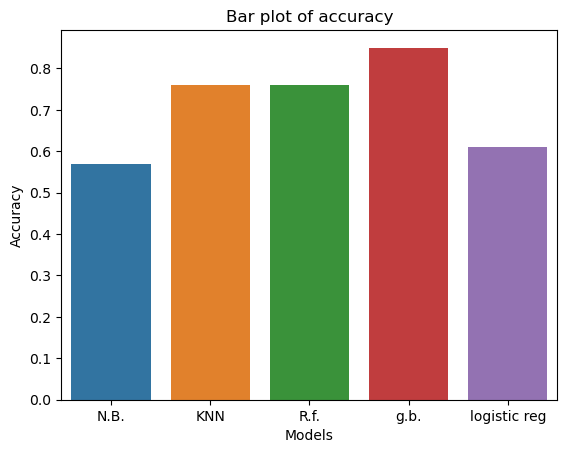

In [46]:
#bar plot of accuracy
sns.barplot(x=result['Model'],y=result['Accuracy'])
plt.title('Bar plot of accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

Interpretation:

1.From above bar plot we conclude that, Gradient boosting classifier is comparatively better than other models to find accuracy of reduced data.

2.KNN algorithm and random forest classifier shows nearly equal accuracy. 

3.Naive Bayes model shows less accuracy as compared to other models.

C:\Users\vansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


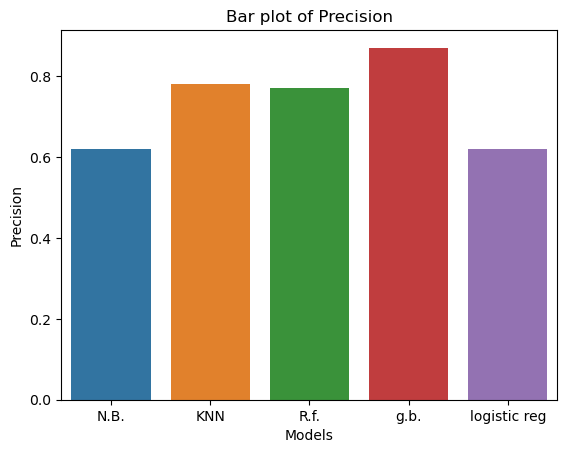

In [47]:
#bar plot of precision
sns.barplot(x=result['Model'],y=result['Precision'])
plt.title('Bar plot of Precision')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.show()

Interpretation:

1.From above bar plot we conclude that, Gradient boosting classifier is comparatively better than other models to find precision of reduced data.

2.KNN algorithm and random forest classifier shows nearly equal precision. 

3.Naive Bayes model and logistic regression shows less precision as compared to other models.

C:\Users\vansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


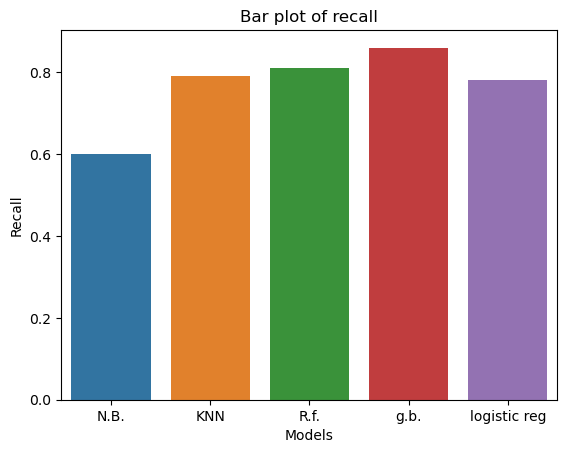

In [48]:
#bar plot of recall
sns.barplot(x=result['Model'],y=result['Recall'])
plt.title('Bar plot of recall')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.show()

Interpretation:

From above bar plot we conclude that, Gradient boosting classifier is comparatively better than other models to find recall of original data.

2.KNN algorithm , random forest classifier and logistic regression shows nearly equal recall.i.e.0.80 approximately.

3.Naive Bayes model shows less recall as compared to other models.

# comparison of models applied on original data and reduced data

Interpretation:

From the graphs, We can say that, Gradient Boosting classifier is comparatively better on both data

# Attribute information



classes: edible=e, poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d